<a href="https://colab.research.google.com/github/MansiSharma7552/ML-Uni/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraraies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score

In [ ]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive('Final Transactions.csv.zip')

INFO patool: Extracting Final Transactions.csv.zip ...
INFO:patool:Extracting Final Transactions.csv.zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_85b3ym_f -- "Final Transactions.csv.zip"
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_85b3ym_f -- "Final Transactions.csv.zip"
INFO patool: ... Final Transactions.csv.zip extracted to `Final Transactions.csv'.
INFO:patool:... Final Transactions.csv.zip extracted to `Final Transactions.csv'.


'Final Transactions.csv'

In [ ]:
patoolib.extract_archive('dataset.zip')

INFO patool: Extracting dataset.zip ...
INFO:patool:Extracting dataset.zip ...
INFO patool: running /usr/bin/7z x -aou -o./Unpack_xcqi0i04 -- dataset.zip
INFO:patool:running /usr/bin/7z x -aou -o./Unpack_xcqi0i04 -- dataset.zip
INFO patool: ... dataset.zip extracted to `dataset' (local file exists).
INFO:patool:... dataset.zip extracted to `dataset' (local file exists).


'dataset'

In [ ]:
df = pd.read_pickle("/content/data/2018-04-01.pkl")
print("dataset shape: ", df.shape)
df.head()

dataset shape:  (9488, 9)


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [ ]:
# Checking data
df = pd.read_csv('/content/Final Transactions.csv')

In [ ]:
df.head(20)

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
5,5,5,2023-01-01 00:10:45,568,8803,401.17,645,0,0,0
6,6,6,2023-01-01 00:11:30,2803,5490,938.54,690,0,0,0
7,7,7,2023-01-01 00:11:44,4684,2486,206.53,704,0,0,0
8,8,8,2023-01-01 00:11:53,4128,8354,253.47,713,0,0,0
9,9,9,2023-01-01 00:13:44,541,6212,555.63,824,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [ ]:
df.describe().round(2)

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
count,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00,1754155.00
mean,877077.00,877077.00,2504.01,4996.73,539.68,7903233.71,90.97,0.13,0.14
std,506381.08,506381.08,1445.99,2886.10,1179.71,4565172.38,52.84,0.34,0.39
min,0.00,0.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00
25%,438538.50,438538.50,1252.00,2502.00,179.95,3940846.50,45.00,0.00,0.00
50%,877077.00,877077.00,2506.00,4994.00,421.75,7902670.00,91.00,0.00,0.00
75%,1315615.50,1315615.50,3765.00,7495.00,750.60,11865661.50,137.00,0.00,0.00
max,1754154.00,1754154.00,4999.00,9999.00,647837.50,15811197.00,182.00,1.00,3.00


In [ ]:
object_cols = ["TX_DATETIME"]

for i in object_cols:
    print("column name : {}".format(i))
    print("Number of unique columns of ", i, ":{}".format(df[i].nunique()))
    print("Values of unique columns of ", i, "is below: \n{}".format(df[i].value_counts()))
    print("------------------------------------------------------------------------")

column name : TX_DATETIME
Number of unique columns of  TX_DATETIME :1635076
Values of unique columns of  TX_DATETIME is below: 
TX_DATETIME
2023-04-03 12:10:19    6
2023-05-01 14:08:48    6
2023-01-07 09:45:29    5
2023-02-16 08:38:32    5
2023-05-12 09:11:39    5
                      ..
2023-03-05 06:36:20    1
2023-03-05 06:36:06    1
2023-03-05 06:36:05    1
2023-03-05 06:35:54    1
2023-03-05 06:38:37    1
Name: count, Length: 1635076, dtype: int64
------------------------------------------------------------------------


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
TRANSACTION_ID,0
TX_DATETIME,0
CUSTOMER_ID,0
TERMINAL_ID,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0


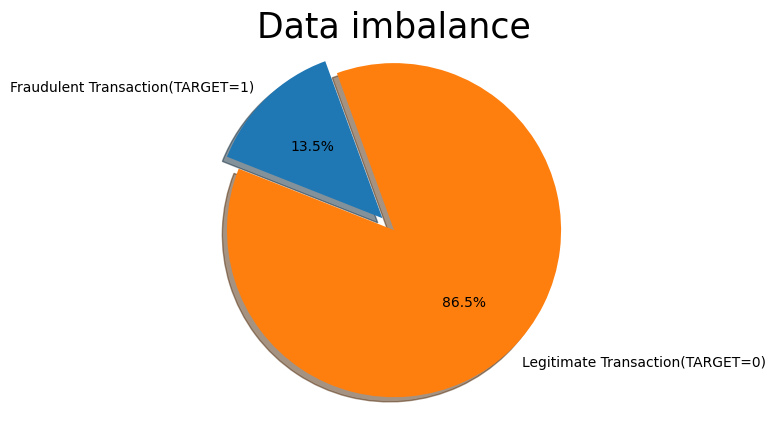

In [ ]:
#EDA(Exploratory Data Analysis)
count1 = 0
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()


In [ ]:
df = pd.read_csv("/content/Final Transactions.csv")

df["month"] = pd.DatetimeIndex(df["TX_DATETIME"]).month

grouped = df.groupby(["month", "TX_FRAUD"]).size().reset_index(name="count")

fig = px.bar(grouped, x="month", y="count", color="TX_FRAUD", barmode="group",
             labels={"month": "Month", "count": "Number of Transactions", "TX_FRAUD": "Transaction Type"})

fig.show()

In [ ]:
df = pd.read_csv("/content/Final Transactions.csv")
df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]
grouped = df.groupby("TX_FRAUD_SCENARIO").size().reset_index(name="count")

fig = px.bar(grouped, x="TX_FRAUD_SCENARIO", y="count", color="TX_FRAUD_SCENARIO",
             labels={"TX_FRAUD_SCENARIO": "Fraud Scenario", "count": "Number of Transactions"})

fig.show()

In [ ]:
df = pd.read_csv("/content/Final Transactions.csv")

df = df[(df['TX_FRAUD_SCENARIO'] != 0) & (df['TX_AMOUNT'] != 0)]

grouped = df.groupby('TX_FRAUD_SCENARIO')['TX_AMOUNT'].mean().reset_index(name='mean_amount')

fig = px.bar(grouped, x='TX_FRAUD_SCENARIO', y='mean_amount', labels={'TX_FRAUD_SCENARIO':'Fraud Scenario','mean_amount':'Average Transaction Amount'})

fig.show()

In [ ]:
df = pd.read_csv("/content/Final Transactions.csv")

df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['date'] = df['TX_DATETIME'].dt.date

grouped = df[df['TX_FRAUD'] == 1].groupby('date').size().reset_index(name='count')

fig = px.line(grouped, x='date', y='count', labels={'date':'Date','count':'Number of Fraud Transactions'})

fig.show()

In [ ]:
 #Data Manipulation
 #!Balancing Data
df = pd.read_csv('/content/Final Transactions.csv')

df = df.drop(df.index[0])

fraud = df[df['TX_FRAUD'] == 1]

non_fraud = df[df['TX_FRAUD'] == 0]

n_non_fraud = len(non_fraud)

fraud_upsampled = fraud.sample(n_non_fraud, replace=True)

df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('cleaned_transactions.csv', index=False)

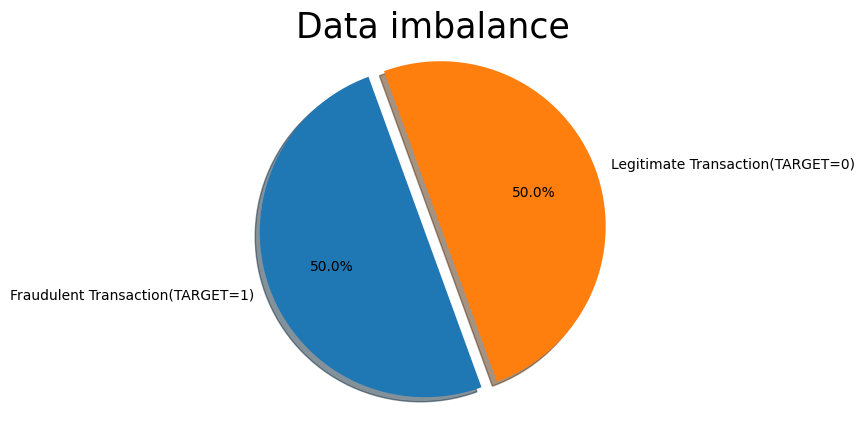

In [ ]:
df = df_upsampled
count1 = 0
count0 = 0
for i in df['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df['TX_FRAUD']))*100
count0 = (count0/len(df['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()


In [ ]:
#Feature Extraction
df = pd.read_csv('/content/cleaned_transactions.csv')

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     619.72         11867589           137
1     613.22          3542397            40
2     244.61           758284             8
3    1279.60         15008109           173
4    1368.94         13286206           153


In [ ]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

In [ ]:
# Selecting the appropriate model
df = pd.read_csv("/content/cleaned_transactions.csv")
X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")

Logistic Regression accuracy: 0.953
K-Nearest Neighbors accuracy: 0.989
Decision Tree accuracy: 0.997
Random Forest accuracy: 1.000
Gradient Boosting accuracy: 0.983


In [ ]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Optimising Decision tree classifier
model = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

y_pred_DTC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_DTC)

Decision Tree Classifier:
Accuracy: 0.9965452168214018
Confusion Matrix:
 [[301642   2041]
 [    57 303534]]


In [ ]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_RFC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_RFC)

Random Forest Classifier:
Accuracy: 0.9995899709192226
Confusion Matrix:
 [[303493    190]
 [    59 303532]]


Text(0.5, 1.0, 'Confusion Matrix: Decision Tree Classifier')

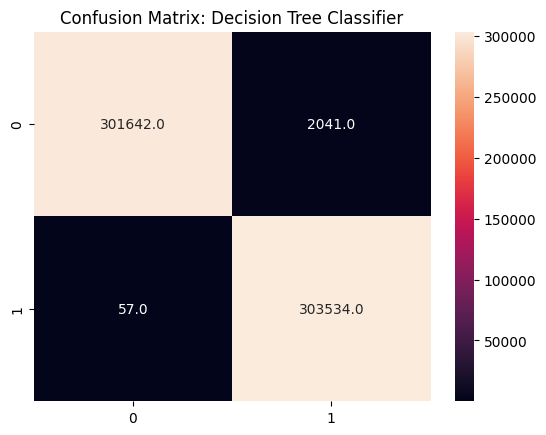

In [ ]:
# Evaluation
cm_sns_DTC = sns.heatmap(cm_DTC,annot=True,fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

Text(0.5, 1.0, 'Confusion Matrix: Random Forest Classifier')

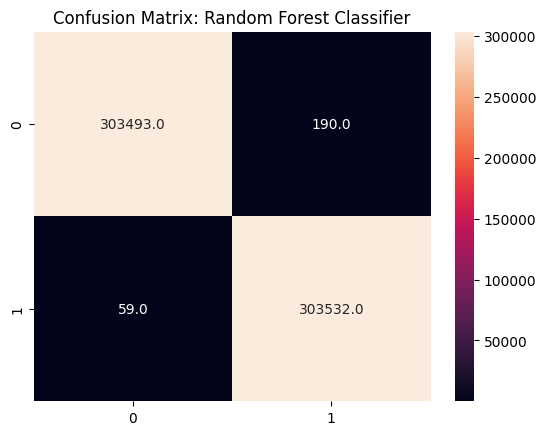

In [ ]:
cm_sns_RFC = sns.heatmap(cm_RFC,annot=True,fmt='.1f')
cm_sns_RFC.set_title('Confusion Matrix: Random Forest Classifier')

In [ ]:
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  0.9933207886770842
Recall:  0.9998122473986383
F1-Score:  0.9965559469832526


In [ ]:
precision_RFC = precision_score(y_test, y_pred_RFC)
recall_RFC = recall_score(y_test, y_pred_RFC)
f1_RFC = f1_score(y_test, y_pred_RFC)
print("Random Forest Classifier")
print("Precision: ", precision_RFC)
print("Recall: ", recall_RFC)
print("F1-Score: ", f1_RFC)

Random Forest Classifier
Precision:  0.9993744279308051
Recall:  0.9998056595880642
F1-Score:  0.9995899972501824


In [ ]:
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier']
metrics = ['Precision', 'Recall', 'F1-Score']

df = pd.DataFrame({'Classifier': [classifiers[0]]*3 + [classifiers[1]]*3,
                   'Metrics': metrics*2,
                   'Score': [precision_DTC, recall_DTC, f1_DTC, precision_RFC, recall_RFC, f1_RFC]})

fig = px.bar(df, x='Classifier', y='Score', color='Metrics', barmode='group',
             height=400, width=600, title="Classifier Performance Metrics")

fig.update_layout(xaxis=dict(categoryorder='category ascending'))
fig.update_traces(customdata=df['Score'],texttemplate='%{customdata}', textposition='auto', textfont=dict(size=8))
fig.update_traces(text=df['Score'], texttemplate='%{text}', textposition='outside', textfont=dict(size=8))
fig.update_traces(hovertemplate='%{x}<br>Score: %{y:.4f}<extra></extra>')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(text=df['Score'].round(2).astype(str), texttemplate='%{text:.4f}', textposition='outside', textfont=dict(size=8))
fig.show()

In [ ]:
average_precision = average_precision_score(y_test, y_pred_DTC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 0.99


In [ ]:
average_precision_RFC = average_precision_score(y_test, y_pred_RFC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 0.99
